In [1]:
import pandas as pd

df = pd.read_csv('ecommerce_dataset.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
from sklearn.cluster import KMeans

# Convert the InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate total cost for each row
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

# Calculate Recency, Frequency and Monetary value for each customer
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)  # reference date

# Grouping by CustomerID
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalCost': 'sum'  # Monetary Value
})

# Rename the columns
rfm_data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalCost': 'MonetaryValue'}, inplace=True)

In [3]:
# Use KMeans to cluster the data
kmeans = KMeans(n_clusters=4, random_state=0).fit(rfm_data)

# Add cluster labels to the data
rfm_data['Cluster'] = kmeans.labels_

rfm_data.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,0
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,0


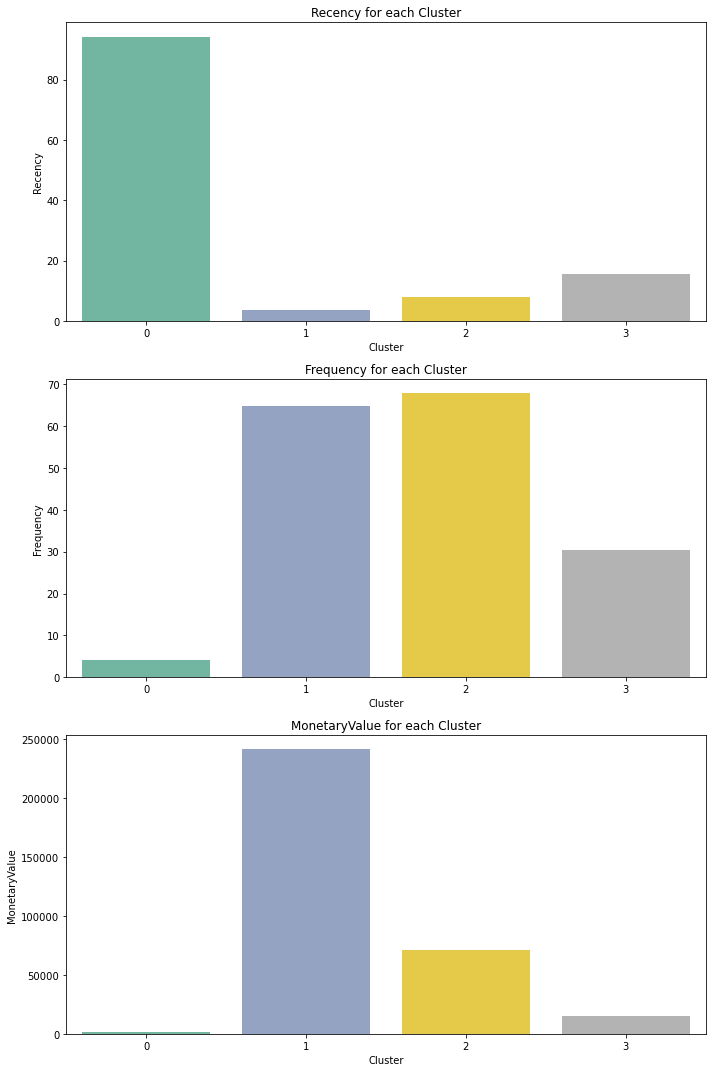

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean RFM values for each cluster
cluster_avg = rfm_data.groupby('Cluster').mean()

# Create a separate chart for each RFM component
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(cluster_avg.index))

# Plot each RFM component
for i, (component, ax) in enumerate(zip(cluster_avg.columns, axs.flatten())):
    sns.barplot(x=cluster_avg.index, y=cluster_avg[component], ax=ax, palette=my_palette.colors)
    ax.set_title(f'{component} for each Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(component)

plt.tight_layout()
plt.show()